In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/philchodrow/Documents/teaching/ml-notes/source':
  os.chdir(r'/Users/philchodrow/Documents/teaching/ml-notes/source')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/importlib/_bootstrap.py": 1669300367.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/importlib/_bootstrap_external.py": 1669300367.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/codecs.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/aliases.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/__init__.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/utf_8.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/latin_1.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/abc.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/io.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/stat.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3

/var/folders/xn/wvbwvw0d6dx46h9_2bkrknnw0000gn/T/ipykernel_88880/949127318.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



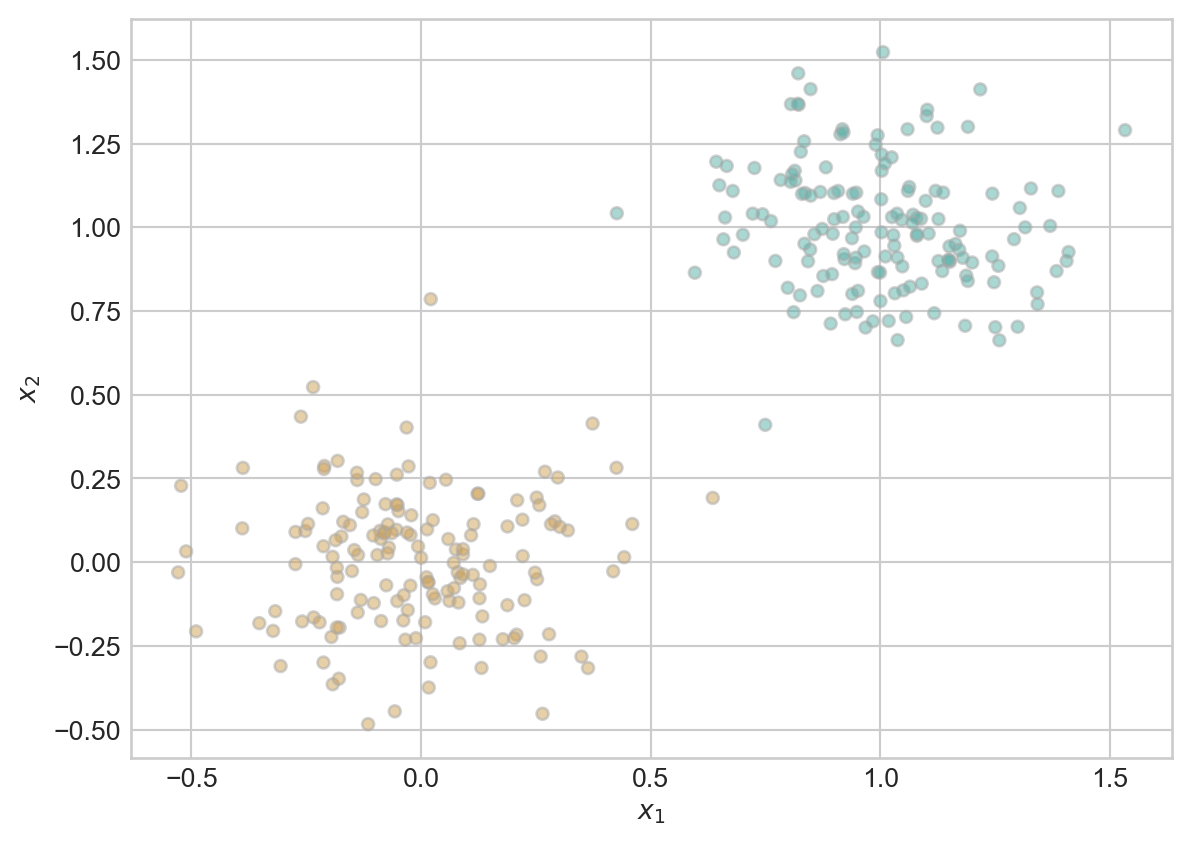

In [2]:
#| fig-cap: '300 data points in the 2d plane, each of which has one of two labels.'
#| fig-cap-location: margin
#| label: fig-scatter

import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision = 3)
plt.style.use('seaborn-v0_8-whitegrid')
# from hidden.perceptron import perceptron_update, draw_line

def perceptron_data(n_points = 300, noise = 0.2):

    y = np.arange(n_points) >= int(n_points/2)
    X = y[:, None] + np.random.normal(0.0, noise, size = (n_points,2))
    X = np.append(X, np.ones((X.shape[0], 1)), 1)
    y = 2*y - 1

    return X, y

def plot_perceptron_data(X, y, ax):
    ax.scatter(X[:,0], X[:,1], s = 20,  c = y, facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5)
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

fig, ax = plt.subplots(1, 1)
X, y = perceptron_data()
plot_perceptron_data(X, y, ax)

In [3]:
#| code-fold: true
def draw_line(w, x_min, x_max, ax, **kwargs):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  l = ax.plot(x, y, **kwargs)

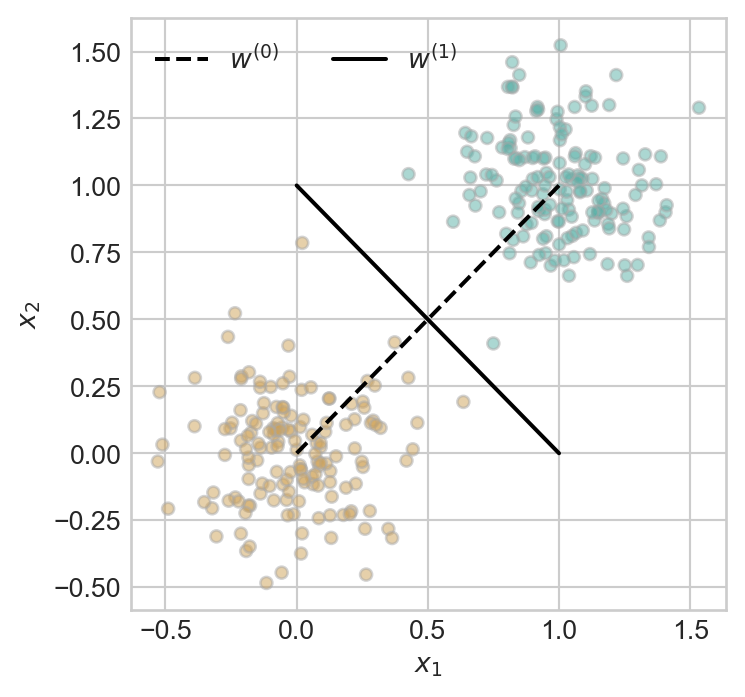

In [4]:
#| fig-cap: Two candidate separating hyperplanes for our data. Which one would you choose?
#| fig-cap-location: margin
#| label: fig-scatter-with-separators

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_perceptron_data(X, y, ax)

w_0 = np.array([1, -1, 0])
w_1 = np.array([1,  1, -1]) 

draw_line(w_0, 0, 1, ax, color = "black", linestyle = "dashed", label = r"$w^{(0)}$")
draw_line(w_1, 0, 1, ax, color = "black", label = r"$w^{(1)}$")

l = ax.legend(ncol = 2)

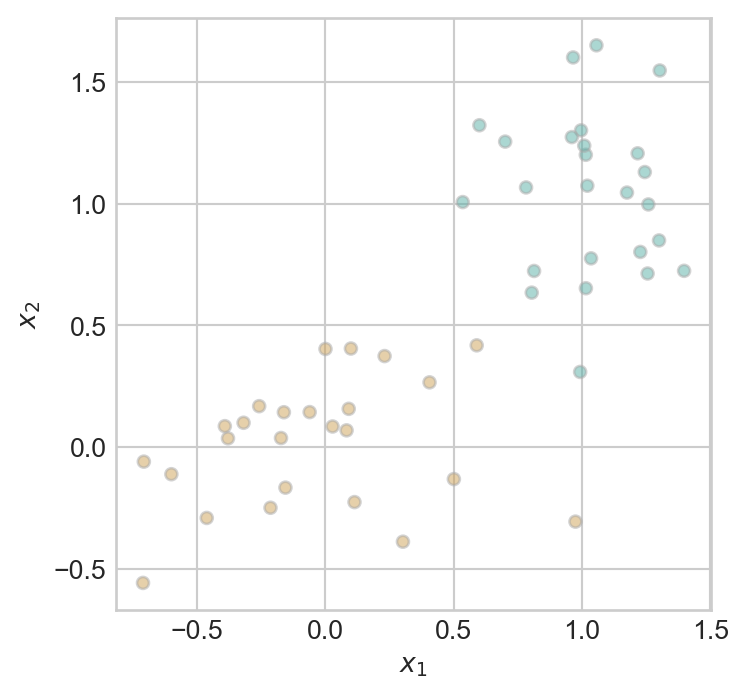

In [5]:
np.random.seed(12345)
X, y = perceptron_data(n_points = 50, noise = 0.3)
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_perceptron_data(X, y, ax)